In [2]:
########################
# Import needed Modules
########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy import stats
%matplotlib inline

In [7]:
# Path = '/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/05032025_full_circuit/'
Path = '/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/26022025_BioCEL/'
# filesNames2Process = glob.glob(Path+'*AU*')
filesNames2Process = glob.glob(Path+ '*')

In [8]:
filesNames2Process

['/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/26022025_BioCEL/10a.fcs',
 '/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/26022025_BioCEL/10b.fcs',
 '/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/26022025_BioCEL/2.fcs',
 '/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/26022025_BioCEL/3.fcs',
 '/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/26022025_BioCEL/1.fcs',
 '/Users/katie/Downloads/mit archive/20.129/VScode_Cytoflow/1_FACsDataTutorial/26022025_BioCEL/0.fcs']

In [10]:
#####################
#Read in the Data
#####################
OldGreenColumnName = 'EGFP-A'
OldRedColumnName = 'mCherry-A'
# OldBlueColumnName = 'DAPI-A'

NewRedColumnName    = 'Red'
NewGreenColumnName  = 'Green'
# NewBlueColumnName  = 'Blue'

theData = pd.DataFrame()

for i in np.arange(len(filesNames2Process)):
    filename = filesNames2Process[i]
    data = pd.read_csv(filename)
    data.rename({OldRedColumnName: NewRedColumnName}, axis=1, inplace=True)
    data.rename({OldGreenColumnName: NewGreenColumnName}, axis=1, inplace=True)
    # data.rename({OldBlueColumnName: NewBlueColumnName}, axis=1, inplace=True)
    theData = pd.concat([theData, data])


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 4165: invalid start byte

In [5]:
#######################
# Ploting functions
######################
def findProb(pdata,nbins,zabins = np.array([])):
    success = True
    if zabins.size == 0:
        hist, bins =np.histogram(pdata)
        zabins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),nbins)
    hist, bins =np.histogram(pdata,bins=zabins)

    if np.sum(hist) == 0:
        success = False
        print('Warning:sum(hist_ = 0, likely problem in simulation')
    probability = hist/float(sum(hist))
    if np.sum(probability) >= 1.01 or np.sum(probability) <= 0.99:
        print('We have a prob problem')
    return((bins,zabins,probability,success))

def customProb(pdata,xlabel,tag,thelogbins = np.logspace(np.log10(10**-1),np.log10(10**10),100),nbins=100,col = 'g',maxValue = 0):
    if np.sum(pdata) == 0:
        pdata = pdata+10**-1
        print("Warning: Adding small value to "+xlabel+"for ploting because solution = 0")
    (_,logbins,probability,success)=findProb(pdata,nbins,zabins = thelogbins)
    
    XDATA = logbins[0:-1]
    plt.plot(XDATA[XDATA>=maxValue],probability[XDATA>=maxValue],col,linewidth=2,label=tag)
    plt.plot(XDATA[XDATA<=maxValue],probability[XDATA<=maxValue],'b',linewidth=2)
    plt.fill_between(XDATA[XDATA>=maxValue],probability[XDATA>=maxValue], color=col, alpha=0.4)
    plt.fill_between(XDATA[XDATA<=maxValue],probability[XDATA<=maxValue], color='b', alpha=0.4)
    plt.xscale('log')
    plt.xlabel(xlabel,fontsize=15)
    #plt.ylabel('probability',fontsize=15)
    plt.tick_params('x', colors='k',labelsize=15)
    plt.tick_params('y', colors='k',labelsize=15)

In [6]:
#Print All Posible Sample Names to Choose From
np.unique(theData['Sample'])

array(['Dox-0-level-1', 'Dox-1-level-1', 'Dox-2-level-1', 'Dox-3-level-1',
       'Dox-4-level-1', 'Dox-5-level-1', 'Negative-1', 'Positive-1',
       'Single-Blue-1', 'Single-Green-1', 'Single-Red-1', 'WildType-1'],
      dtype=object)

# Calculate Transfection Efficiency

['Dox-0-level-1']
Dox-0-level-1
['g', 'r', 'b']
[0.09, 0.17, 0.26]
['Dox-1-level-1']
Dox-1-level-1
['g', 'r', 'b']
[0.09, 0.15, 0.3]
['Dox-2-level-1']
Dox-2-level-1
['g', 'r', 'b']
[0.12, 0.16, 0.31]
['Dox-3-level-1']
Dox-3-level-1
['g', 'r', 'b']
[0.21, 0.17, 0.37]
['Dox-4-level-1']
Dox-4-level-1
['g', 'r', 'b']
[0.26, 0.12, 0.34]
['Dox-5-level-1']
Dox-5-level-1
['g', 'r', 'b']
[0.37, 0.13, 0.36]


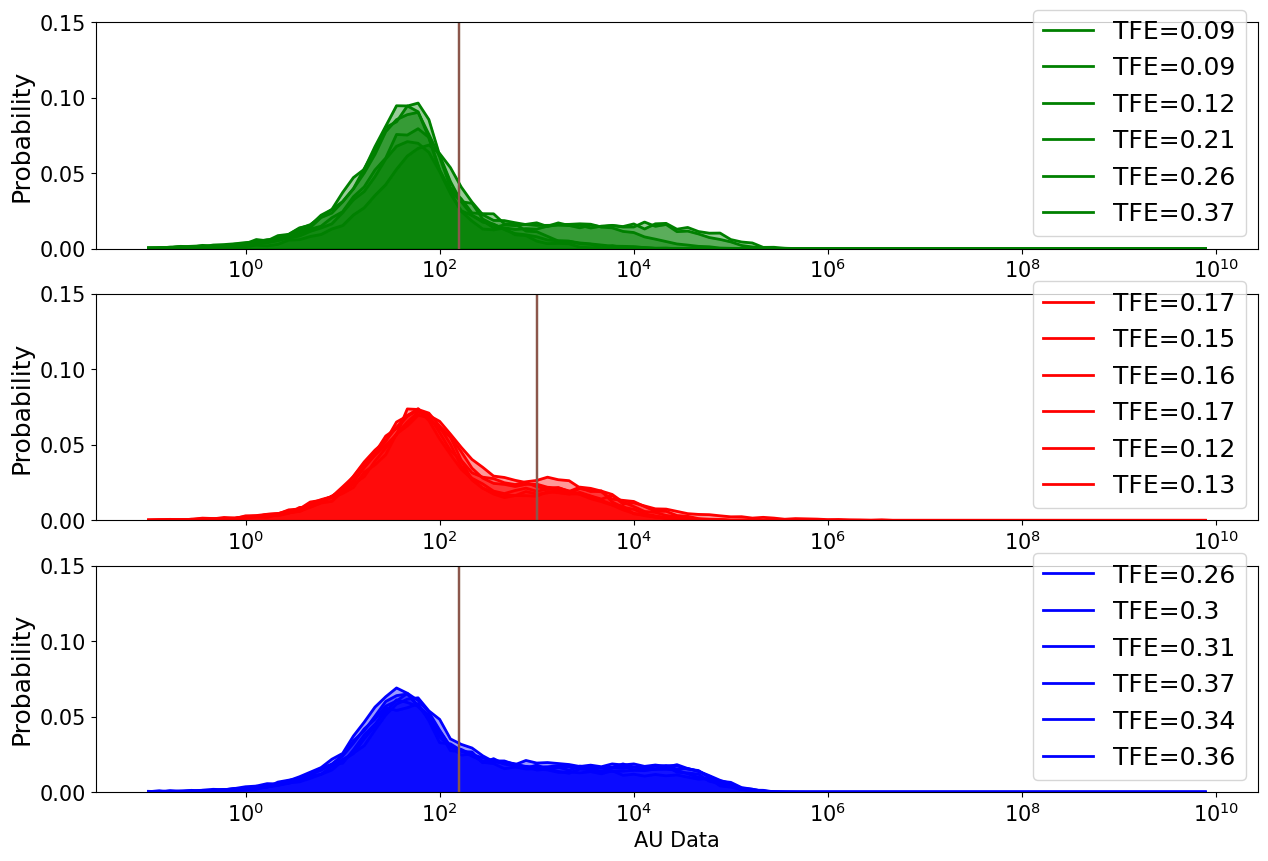

In [7]:
plt.figure(figsize=(15,10))

for SampleName in ['Dox-0-level-1','Dox-1-level-1','Dox-2-level-1',
                   'Dox-3-level-1','Dox-4-level-1','Dox-5-level-1']:
    colorTranfectionBounds = [10**2.2,10**3,10**2.2]
    xlabels = ['Green','Red','Blue']
    TFEs = []

    colors = ['g','r','b']
    for j in [1,2,3]:
        plt.subplot(3,1,j)
        
        data2lookat = "'"+SampleName+"' in Sample"
        pdata = theData.query(data2lookat)
        
        data2lookat = "'"+SampleName+"' in Sample and "+xlabels[j-1]+">"+str(colorTranfectionBounds[j-1])
        tdata = theData.query(data2lookat)
        TFE = np.round((len(tdata[xlabels[j-1]])/len(pdata[xlabels[j-1]])),2)
        TFEs.append(TFE)
        
        sample = np.unique(pdata['Sample'])
        customProb(np.array(pdata[xlabels[j-1]]),'','TFE='+str(TFE),col = colors[j-1])
        plt.plot([colorTranfectionBounds[j-1],colorTranfectionBounds[j-1]],[0,0.15])
        
        plt.legend(fontsize=18)
        plt.ylim([0,0.15])
        plt.ylabel('Probability',fontsize=18)
    print(sample)
    plt.xlabel('AU Data');

    # Data values
    # Create bar chart
    # plt.figure()
    # plt.bar(range(len(TFEs)), TFEs, color=colors, alpha=0.5, edgecolor=colors, linewidth=2)

    # # Labels and title
    # plt.xticks(range(len(TFEs)), ['Green', 'Red', 'Blue'])  # Adjust labels as needed
    # plt.ylabel('TFE')

    # plt.title(SampleName)
    # # Show plot
    # plt.show()

    print(SampleName)
    print(colors)
    print(TFEs)




# Pull Out Data by Transfection Bin

In [8]:
# If you used TM22 as transfection marker (hEf1a_TagBFP) - you need to change this to Blue
# If you used TM21 (hEf1a_mKO2) - you need to change this to Red
BinColor = 'Blue'
BlueBinValues = np.unique(theData['BlueBin'])
BinValues = BlueBinValues

In [9]:
theData.columns

Index(['Unnamed: 0', 'Abreviation', 'DOXLevel', 'FSC-A', 'FSC-H', 'FSC-W',
       'GenralType', 'PE-Cy7-A', 'PerCP-Cy5.5-A', 'SSC-A', 'Sample', 'TIME',
       'mPlum-A', 'Morpho1', 'Morpho1_1', 'Morpho1_2', 'Morpho2_1', 'Green',
       'Red', 'Blue', 'BlueBin', 'BlueBin_Count'],
      dtype='object')

Dox-0-level-1


Text(0, 0.5, 'Red')

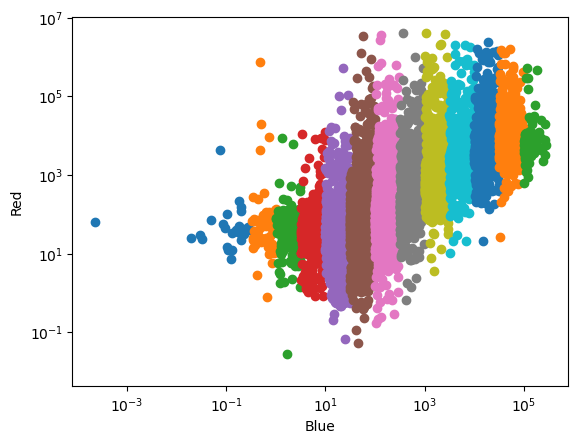

In [10]:
SampleName = 'Dox-0-level-1'
print(SampleName)
colors = ['b','g','c','k','r','b','g','c','k','r','b','g','c','k','r']

# blue vs red
for theBin in BinValues:
    data2lookat = "'"+SampleName+"' in Sample and "+BinColor+"Bin == "+str(theBin)
    data = theData.query(data2lookat)
    X = data[BinColor]
    Y = data['Red']
    plt.plot(X,Y,'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(BinColor)
plt.ylabel('Red')

# For the DOX dose reponce curve, plot the geometric mean of the GREEN Channel for every transfection bin

In [11]:
def geom_mean(a):
    """
    Compute the geometric mean for an "arbitrary" data set, ie one that
    contains zeros and negative numbers.
    
    Parameters
    ----------
    
    a : array-like
        A numpy.ndarray, or something that can be converted to an ndarray
        
    Returns
    -------
    The geometric mean of the input array
    
    Notes
    -----
    The traditional geometric mean can not be computed on a mixture of positive
    and negative numbers.  The approach here, validated rigorously in the
    cited paper[1], is to compute the geometric mean of the absolute value of
    the negative numbers separately, and then take a weighted arithmetic mean
    of that and the geometric mean of the positive numbers.  We're going to 
    discard 0 values, operating under the assumption that in this context
    there are going to be few or no observations with a value of exactly 0.
    
    References
    ----------
    [1] Geometric mean for negative and zero values
        Elsayed A. E. Habib
        International Journal of Research and Reviews in Applied Sciences
        11:419 (2012)
        http://www.arpapress.com/Volumes/Vol11Issue3/IJRRAS_11_3_08.pdf
    """
    
    a = np.array(a)
    pos = a[a > 0]
    pos_mean = stats.gmean(pos)
    pos_prop = pos.size / a.size
    
    neg = a[a < 0]
    neg = np.abs(neg)
    neg_mean = stats.gmean(neg) if neg.size > 0 else 0
    neg_prop = neg.size / a.size
    
    return (pos_mean * pos_prop) - (neg_mean * neg_prop)

In [12]:
#Print All Posible Sample Names to Choose From
np.unique(theData['Sample'])

array(['Dox-0-level-1', 'Dox-1-level-1', 'Dox-2-level-1', 'Dox-3-level-1',
       'Dox-4-level-1', 'Dox-5-level-1', 'Negative-1', 'Positive-1',
       'Single-Blue-1', 'Single-Green-1', 'Single-Red-1', 'WildType-1'],
      dtype=object)

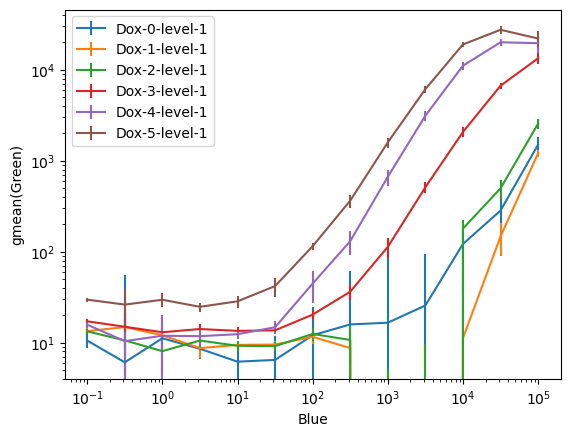

In [13]:
tags = ['Dox-0-level-1',
        'Dox-1-level-1',
        'Dox-2-level-1',
        'Dox-3-level-1',
        'Dox-4-level-1',
        'Dox-5-level-1']
        # 'Single-Blue-1',
        # 'Single-Red-1',
        # 'Single-Green-1',
        # 'Positive-1',
        # 'Negative-1',
        # 'WildType-1',]

colors = ['b','g','c','k','r','b','g','c','k','r','b','g','c','k','r']

for tagi in np.arange(len(tags)):
    i = 0
    gmean_Green = np.array([])
    gerror_Green = np.array([])
    binValuesUsed = np.array([])
    #print("taged for",tags[tagi])
    for theBin in BinValues:
        data2lookat = "'"+tags[tagi]+"' in Sample and "+BinColor+"Bin == "+str(theBin)+" and "+BinColor+"Bin_Count > 1000"
        data = theData.query(data2lookat)
        X = data[BinColor]
        Y = data['Green']
        if len(Y) > 0:
            gmean = np.array(geom_mean(Y))
            gerror = stats.sem(Y)
            gmean_Green = np.hstack([gmean_Green,gmean])
            gerror_Green = np.hstack([gerror_Green,gerror])
            binValuesUsed = np.hstack([binValuesUsed,theBin])
        i =+ 1
    plt.errorbar(binValuesUsed,gmean_Green, yerr=gerror_Green,label=tags[tagi])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(BinColor)
plt.ylabel('gmean(Green)')
plt.legend()
#plt.ylim([10**0,10**3])

### Pool replicates if the SEM is much larger for individual samples then the difference between technical replicates

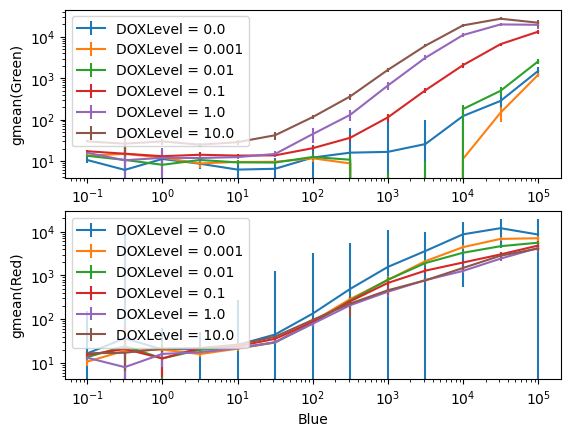

In [14]:
doxLevels = np.unique(theData['DOXLevel'])

colors = ['b','g','c','k','r','b','g','c','k','r','b','g','c','k','r']

bin2Pull = 10**5.0
DOX_LVLs_4bin2Pull = np.array([])
gMeans_green_4bin2Pull = np.array([])
gMeans_red_4bin2Pull = np.array([])
gError_green_4bin2Pull = np.array([])
gError_red_4bin2Pull = np.array([])
for doxLevel in doxLevels:
    i = 0
    gmean_Green = np.array([])
    gmean_Red = np.array([])
    gerror_Green = np.array([])
    gerror_Red = np.array([])
    binValuesUsed = np.array([])
    for theBin in BinValues:
        data2lookat = "DOXLevel == "+str(doxLevel)+" and 'DNA6' in Abreviation and "+BinColor+"Bin == "+str(theBin)+" and "+BinColor+"Bin_Count > 1000"
        data = theData.query(data2lookat)
        X = data[BinColor]
        Y = data['Green']
        if len(Y) > 0:
            gmean = np.array(geom_mean(Y))
            gmeanRed = np.array(geom_mean(data['Red']))
            gerror = stats.sem(Y)
            gerrorRed = stats.sem(data['Red'])
            gmean_Green = np.hstack([gmean_Green,gmean])
            gerror_Green = np.hstack([gerror_Green,gerror])
            gmean_Red = np.hstack([gmean_Red,gmeanRed])
            gerror_Red = np.hstack([gerror_Red,gerrorRed])
            binValuesUsed = np.hstack([binValuesUsed,theBin])
            if theBin == bin2Pull:
                gMeans_green_4bin2Pull = np.hstack([gMeans_green_4bin2Pull,gmean])
                gMeans_red_4bin2Pull = np.hstack([gMeans_red_4bin2Pull,gmeanRed])
                DOX_LVLs_4bin2Pull = np.hstack([DOX_LVLs_4bin2Pull,doxLevel])
                gError_green_4bin2Pull  = np.hstack([gError_green_4bin2Pull,gerror])  
                gError_red_4bin2Pull  = np.hstack([gError_red_4bin2Pull,gerrorRed])
                
        i =+ 1
    plt.subplot(2,1,1)
    plt.errorbar(binValuesUsed,gmean_Green, yerr=gerror_Green,label="DOXLevel = "+str(doxLevel))
    plt.subplot(2,1,2)
    plt.errorbar(binValuesUsed,gmean_Red, yerr=gerror_Red,label="DOXLevel = "+str(doxLevel))
plt.subplot(2,1,1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(BinColor)
plt.ylabel('gmean(Green)')
plt.legend()
#plt.ylim([10**0,10**2])

plt.subplot(2,1,2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(BinColor)
plt.ylabel('gmean(Red)')
plt.legend()
#plt.ylim([10**0,10**2])

# Plot DOX level versus gMean for a single bin
#### Use bi-exponetial scale to avoid trying to plot log(0)

In [15]:
def biexpfunc(x, a = 1, b = 0.0001, c = 10**4, d = 0.01, e = 0.999999):
    y_new = []
    for i in range(len(x)):
        y = (((a * 10**(b*x[i])) + ((1-a) * 10**(d*x[i]))))-e
        y_new.append(y*c)
    return y_new
#biexpfunc(DOX_LVLs_4bin2Pull)

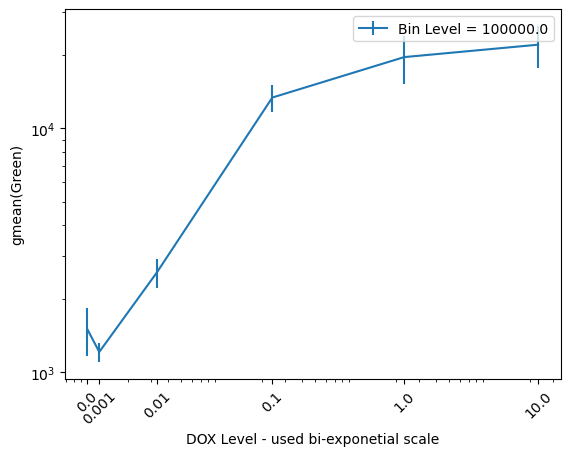

In [16]:
fig, ax = plt.subplots()

plt.errorbar(biexpfunc(DOX_LVLs_4bin2Pull),gMeans_green_4bin2Pull, yerr=gError_green_4bin2Pull,label="Bin Level = "+str(bin2Pull))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("DOX Level - used bi-exponetial scale")
plt.ylabel('gmean(Green)')
plt.legend()
x1 = biexpfunc(DOX_LVLs_4bin2Pull);
textLabels =[str(i) for i in DOX_LVLs_4bin2Pull];
plt.xticks(x1, textLabels, rotation=45);


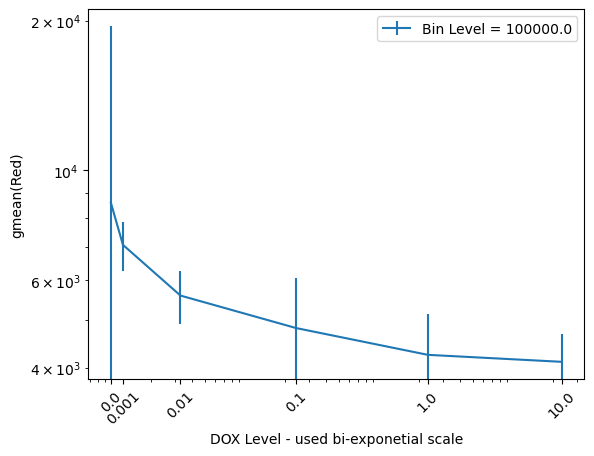

In [17]:
fig, ax = plt.subplots()

plt.errorbar(biexpfunc(DOX_LVLs_4bin2Pull),gMeans_red_4bin2Pull, yerr=gError_red_4bin2Pull,label="Bin Level = "+str(bin2Pull))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("DOX Level - used bi-exponetial scale")
plt.ylabel('gmean(Red)')
plt.legend()
x1 = biexpfunc(DOX_LVLs_4bin2Pull);
textLabels =[str(i) for i in DOX_LVLs_4bin2Pull];
plt.xticks(x1, textLabels, rotation=45);

# Plot Green versus Red output for a different Bins

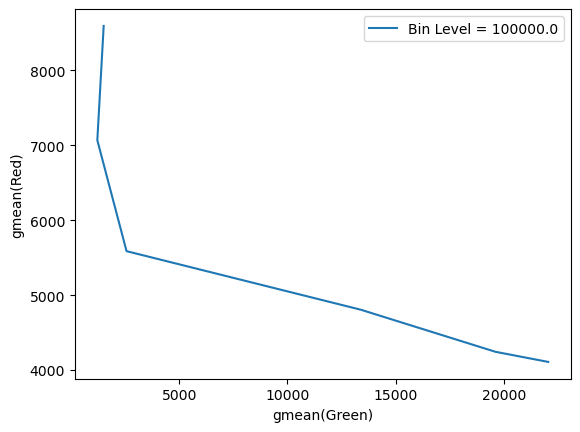

In [18]:
fig, ax = plt.subplots()

plt.errorbar(gMeans_green_4bin2Pull,gMeans_red_4bin2Pull,label="Bin Level = "+str(bin2Pull))
# plt.xscale('log')
# plt.yscale('log')
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel("gmean(Green)")
plt.ylabel('gmean(Red)')
plt.legend()